In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
raw_data = pd.read_json('tvSeries_complete.json', orient='records')

In [5]:
print(raw_data.shape)
print(raw_data.head(10).keywords)

(8735, 12)
0    based-on-novel,dragon,politics,nudity,incest,q...
1    cancer,chemistry,methamphetamine,albuquerque-n...
2    government-conspiracy,1980s,friendship,telekin...
3    zombie,survival,post-apocalypse,based-on-comic...
4    friendship,friend,new-york-city,roommate,divor...
5    friendship,detective,modernized-setting,genius...
6    nerd,geek-culture,friend,roommate,best-friend,...
7    double-life,police-department,dark-secret,homi...
8    group-of-friends,friendship,sitcom,best-friend...
9    office,mockumentary,cringe-comedy,job,sitcom,w...
Name: keywords, dtype: object


In [6]:
df_keywords = raw_data['keywords']

In [7]:
df_keywords_clean = df_keywords.str.replace('-',' ').str.replace(',',' ')

In [8]:
print(df_keywords_clean)

0       based on novel dragon politics nudity incest q...
1       cancer chemistry methamphetamine albuquerque n...
2       government conspiracy 1980s friendship telekin...
3       zombie survival post apocalypse based on comic...
4       friendship friend new york city roommate divor...
                              ...                        
8730    actor playing multiple roles double act comedy...
8731                                                     
8732    fanservice ecchi magician breasts bouncing bre...
8733                                                 tank
8734    barbie based on toy japanese american african ...
Name: keywords, Length: 8735, dtype: object


### Bag of words feature representation for descriptive text

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word')

# corpus = raw_data['keywords']
corpus = df_keywords_clean
X = vectorizer.fit_transform(corpus)
X.shape

(8735, 14707)

In [10]:
print(vectorizer.vocabulary_)

{'based': 1338, 'on': 9307, 'novel': 9153, 'dragon': 4164, 'politics': 10104, 'nudity': 9172, 'incest': 6675, 'queen': 10598, 'war': 14219, 'between': 1532, 'families': 4861, 'abuse': 371, 'of': 9262, 'power': 10212, 'brother': 1978, 'sister': 12058, 'bastard': 1352, 'son': 12288, 'twins': 13707, 'kingdom': 7318, 'family': 4863, 'conflict': 3036, 'prince': 10320, 'civil': 2691, 'husband': 6496, 'wife': 14397, 'relationship': 10909, 'bloody': 1704, 'violence': 14095, 'king': 7317, 'murder': 8772, 'swordplay': 12950, 'witchcraft': 14453, 'prostitution': 10421, 'forced': 5204, 'marriage': 8113, 'sex': 11781, 'scene': 11516, 'sorcery': 12309, 'vow': 14162, 'chastity': 2520, 'infidelity': 6744, 'magic': 7940, 'illegitimate': 6589, 'royalty': 11271, 'female': 4965, 'struggle': 12703, 'intrigue': 6900, 'secret': 11640, 'fictional': 5009, 'abstinence': 364, 'evil': 4693, 'betrayal': 1525, 'usurper': 13926, 'sibling': 11968, 'rivalry': 11148, 'missing': 8521, 'hand': 5993, 'child': 2585, 'bride

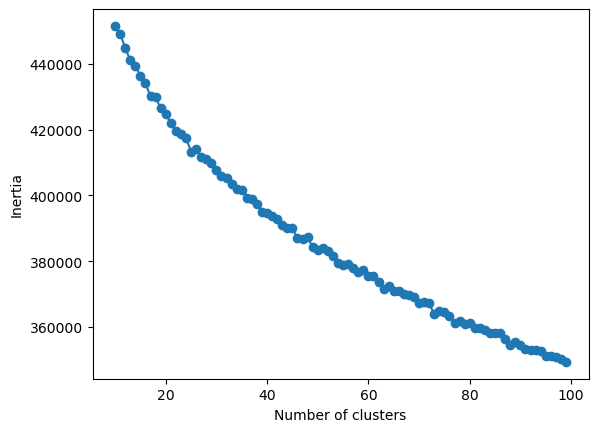

In [110]:
# first attempt at fitting K means to view change in Inertia
from sklearn.cluster import KMeans

# container to store inertia scores over iterations
distortions = []

# # fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(10, 100):
    km = KMeans(n_clusters=i, n_init=30)
    km.fit(X)
    distortions.append(km.inertia_)

len(distortions)
    
# vizualize change in inertia
plt.plot(range(10, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# first attempt at fitting K means to view change in Inertia
from sklearn.cluster import KMeans

# container to store inertia scores over iterations
distortions = []

# # fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(50, 500):
    km = KMeans(n_clusters=i, n_init=30)
    km.fit(X)
    distortions.append(km.inertia_)

len(distortions)
    
# vizualize change in inertia
plt.plot(range(50, 500), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [ ]:
# first attempt at fitting K means to view change in Inertia
from sklearn.cluster import KMeans

# container to store inertia scores over iterations
distortions = []

# # fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(90, 900):
    km = KMeans(n_clusters=i, n_init=30)
    km.fit(X)
    distortions.append(km.inertia_)

len(distortions)
    
# vizualize change in inertia
plt.plot(range(90, 900), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### fit Kmeans

In [11]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=37, n_init=10)
km.fit(X)

KMeans(n_clusters=37)

### labels are named with integers and stored in the `labels_` attribute

In [12]:
km.labels_

array([10, 18,  6, ...,  1,  1,  1], dtype=int32)

In [29]:
print(km.cluster_centers_)
print(km.labels_.shape)

clusters = km.labels_.tolist()
print(clusters[:10])

[[0.         0.         0.00526316 ... 0.         0.         0.        ]
 [0.         0.00039154 0.00039154 ... 0.00019577 0.         0.00019577]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.01176471 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(8735,)


AttributeError: 'list' object has no attribute 'head'

In [28]:
clusters = data['cluster']
print(data.head(3))
print(data.head(3))

NameError: name 'data' is not defined

In [22]:
{i: X[np.where(km.labels_ == i)] for i in range(km.n_clusters)}

{0: <380x14707 sparse matrix of type '<class 'numpy.int64'>'
 	with 18753 stored elements in Compressed Sparse Row format>,
 1: <5108x14707 sparse matrix of type '<class 'numpy.int64'>'
 	with 48421 stored elements in Compressed Sparse Row format>,
 2: <5x14707 sparse matrix of type '<class 'numpy.int64'>'
 	with 895 stored elements in Compressed Sparse Row format>,
 3: <13x14707 sparse matrix of type '<class 'numpy.int64'>'
 	with 1721 stored elements in Compressed Sparse Row format>,
 4: <60x14707 sparse matrix of type '<class 'numpy.int64'>'
 	with 4720 stored elements in Compressed Sparse Row format>,
 5: <66x14707 sparse matrix of type '<class 'numpy.int64'>'
 	with 5956 stored elements in Compressed Sparse Row format>,
 6: <111x14707 sparse matrix of type '<class 'numpy.int64'>'
 	with 8532 stored elements in Compressed Sparse Row format>,
 7: <1x14707 sparse matrix of type '<class 'numpy.int64'>'
 	with 191 stored elements in Compressed Sparse Row format>,
 8: <36x14707 sparse m

In [23]:
print(X[np.where(km.labels_ == 0)].shape)
print(X.shape)

(380, 14707)
(8735, 14707)


In [24]:
cluster_count = data.groupby(['cluster'])['cluster'].count()
cluster_count = pd.DataFrame(dict(cluster=cluster_count.index, count=cluster_count.values))

NameError: name 'data' is not defined

In [13]:
top_examples = [
    'Lupin',
    'Ginny & Georgia',
    'The Fosters',
    'Frontier',
    'Jon & Kate Plus 8',
    'Mixed-ish',
    'The Deep',
    'Sid the Science Kid',
    'The Casagrandes',
    'Euphoria'
]

In [12]:
med_examples_couple = [
    'Bridgerton',
    'Firefly',
    'Sex Education',
    'Shameless',
    'Private Practice',
    'Lost',
    'Scrubs',
    'Six Feet Under',
    'Desperate Housewives',
    'One Tree Hill',
    'ER',
    'The 4400',
    '90210',
    'Empire',
    'Happy Endings',
    'Big Little Lies',
    'Dynasty',
    'The L Word',
    'Crazy Ex-Girlfriend'
]

In [13]:
med_examples_family = [
    'Wizards of Waverly Place',
    'Modern Family',
    'Gilmore Girls',
    'The Fosters',
    'Parenthood',
    'October Faction'
]

In [14]:
nokeywords_examples = [
    'The Summer I Turned Pretty',
    'Harry & Meghan',
    'Dear White People'
#     'The Last of Us'
]

In [15]:
len(top_examples)

10

In [14]:
# search for a group of shows that are model examples and see which clusters they are in 

# model_examples = ['The Summer I Turned Pretty', 'Ginny & Georgia', 'Harry & Megan', 'Bridgerton', 'Lupin', 'Dear White People', 'Wizards of Waverly Place', 'Private Practice', 'Six Feet Under']

for i in range(0,len(km.labels_)):
    for j in range(0,len(top_examples)):
        if (top_examples[j] == raw_data['primaryTitle'][i]):
            print(raw_data['primaryTitle'][i],'is in cluster:', km.labels_[i])


Euphoria is in cluster: 0
Lupin is in cluster: 17
Ginny & Georgia is in cluster: 0
The Fosters is in cluster: 6
Frontier is in cluster: 1
Jon & Kate Plus 8 is in cluster: 6
Mixed-ish is in cluster: 0
The Casagrandes is in cluster: 6
The Deep is in cluster: 0
Sid the Science Kid is in cluster: 17


In [46]:
# See which cluster each tv show is in 
for i in range(0,len(km.labels_)):
        print(raw_data['primaryTitle'][i],'is in cluster:', km.labels_[i])
        print('**********')

Game of Thrones is in cluster: 9
**********
Breaking Bad is in cluster: 5
**********
Stranger Things is in cluster: 5
**********
The Walking Dead is in cluster: 3
**********
Friends is in cluster: 5
**********
Sherlock is in cluster: 0
**********
The Big Bang Theory is in cluster: 5
**********
Dexter is in cluster: 0
**********
How I Met Your Mother is in cluster: 5
**********
The Office is in cluster: 6
**********
True Detective is in cluster: 0
**********
Peaky Blinders is in cluster: 2
**********
Black Mirror is in cluster: 2
**********
Lost is in cluster: 5
**********
Better Call Saul is in cluster: 5
**********
Prison Break is in cluster: 5
**********
Vikings is in cluster: 2
**********
Rick and Morty is in cluster: 6
**********
The Boys is in cluster: 4
**********
The Mandalorian is in cluster: 4
**********
Westworld is in cluster: 2
**********
The Witcher is in cluster: 9
**********
House of Cards is in cluster: 2
**********
Money Heist is in cluster: 2
**********
House is in cl

In [15]:
# search for a specific show and which cluster it is located in

for i in range(0,len(km.labels_)):
    if raw_data['primaryTitle'][i] == 'Private Practice':
        print(raw_data['primaryTitle'][i],'is in cluster:', km.labels_[i])
        print('**********')

Private Practice is in cluster: 31
**********


### take a look at one of the cluster results

In [16]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 6:
#         print(len(km.labels_[i]))
        print(raw_data['primaryTitle'][i])
        print(raw_data['genres'][i])
        print(raw_data['keywords'][i])
        print('**********')

Stranger Things
Drama,Fantasy,Horror
government-conspiracy,1980s,friendship,telekinesis,single-mother,monster,forest,missing-person,small-town,mother-son-relationship,russian,indiana,secret-laboratory,neo-80s,bicycle,walkie-talkie,teenager,year-1983,small-town-sheriff,mk-ultra,brother-brother-relationship,missing-child,monster-horror,lesbian-character,dungeons-and-dragons,retro-horror,middle-school,group-of-friends,missing-friend,boy,nosebleed,hospital,friend,small-town-police-chief,parallel-universe,retro,funeral,abduction,teenage-girl,rural-police-chief,missing-girl,missing-boy,missing-son,two-word-title,flashback,child,teenage-boy,police-station,fictional-town,nerd,christmas-lights,town-with-a-dark-secret,year-1984,year-1985,year-1986,year-1987,number-as-a-name,teacher,fight,chase,telephone,school,tattooed-number-on-arm,investigation,paranormal-phenomenon,police,little-girl,working-mother,short-haired-female,mother-daughter-relationship,boyfriend-girlfriend-relationship,alternate-di

In [17]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [37, 38, 39, 40, 41]

For n_clusters = 37 The average silhouette_score is : -0.009275562098144249


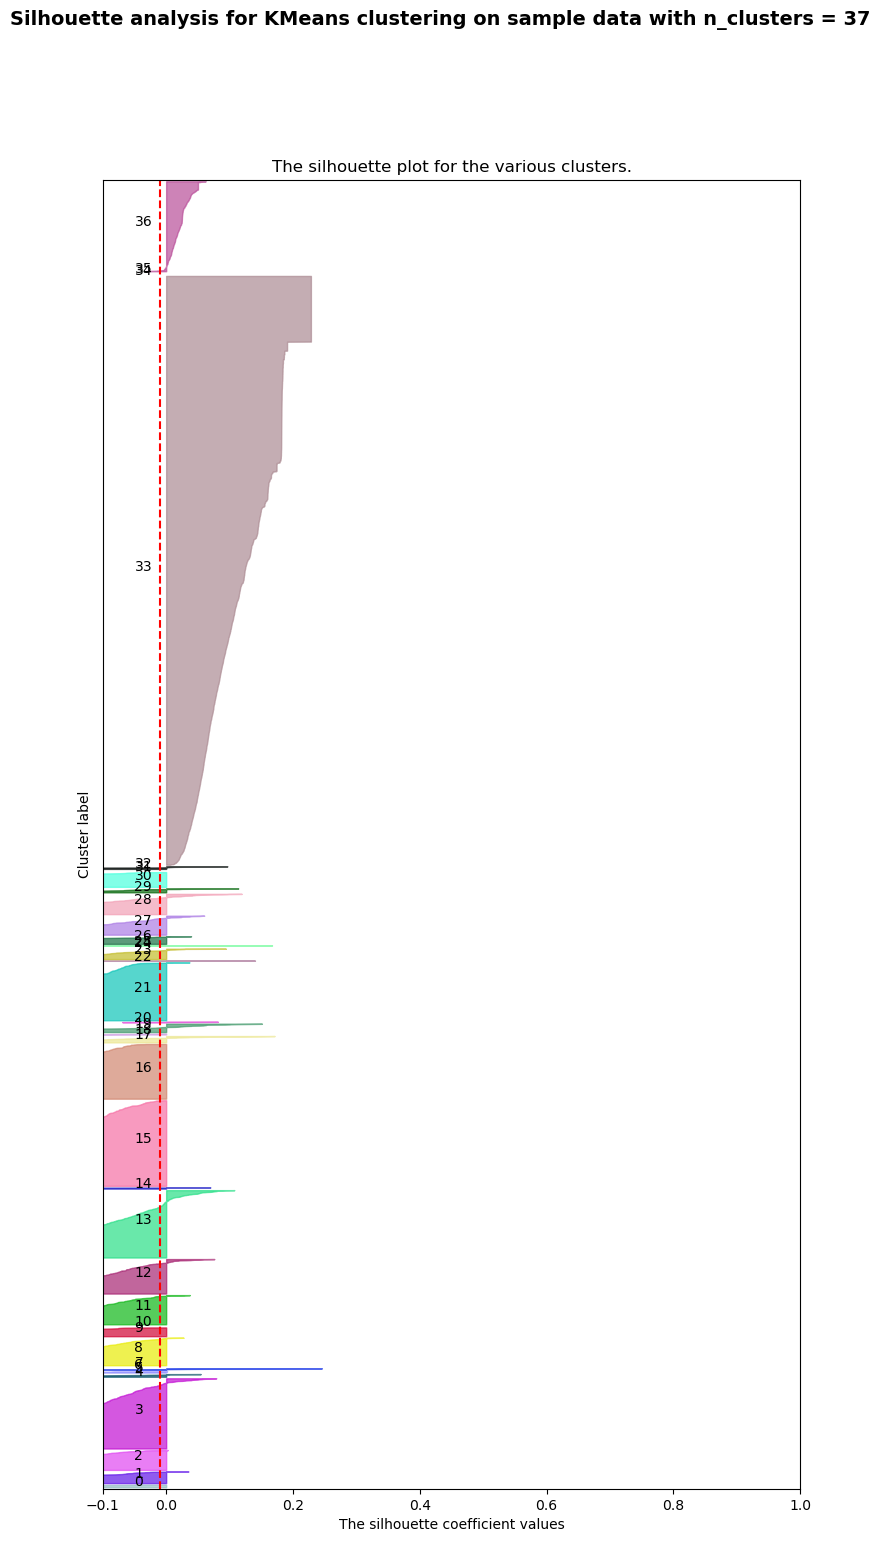

For n_clusters = 38 The average silhouette_score is : 0.13704127576378433


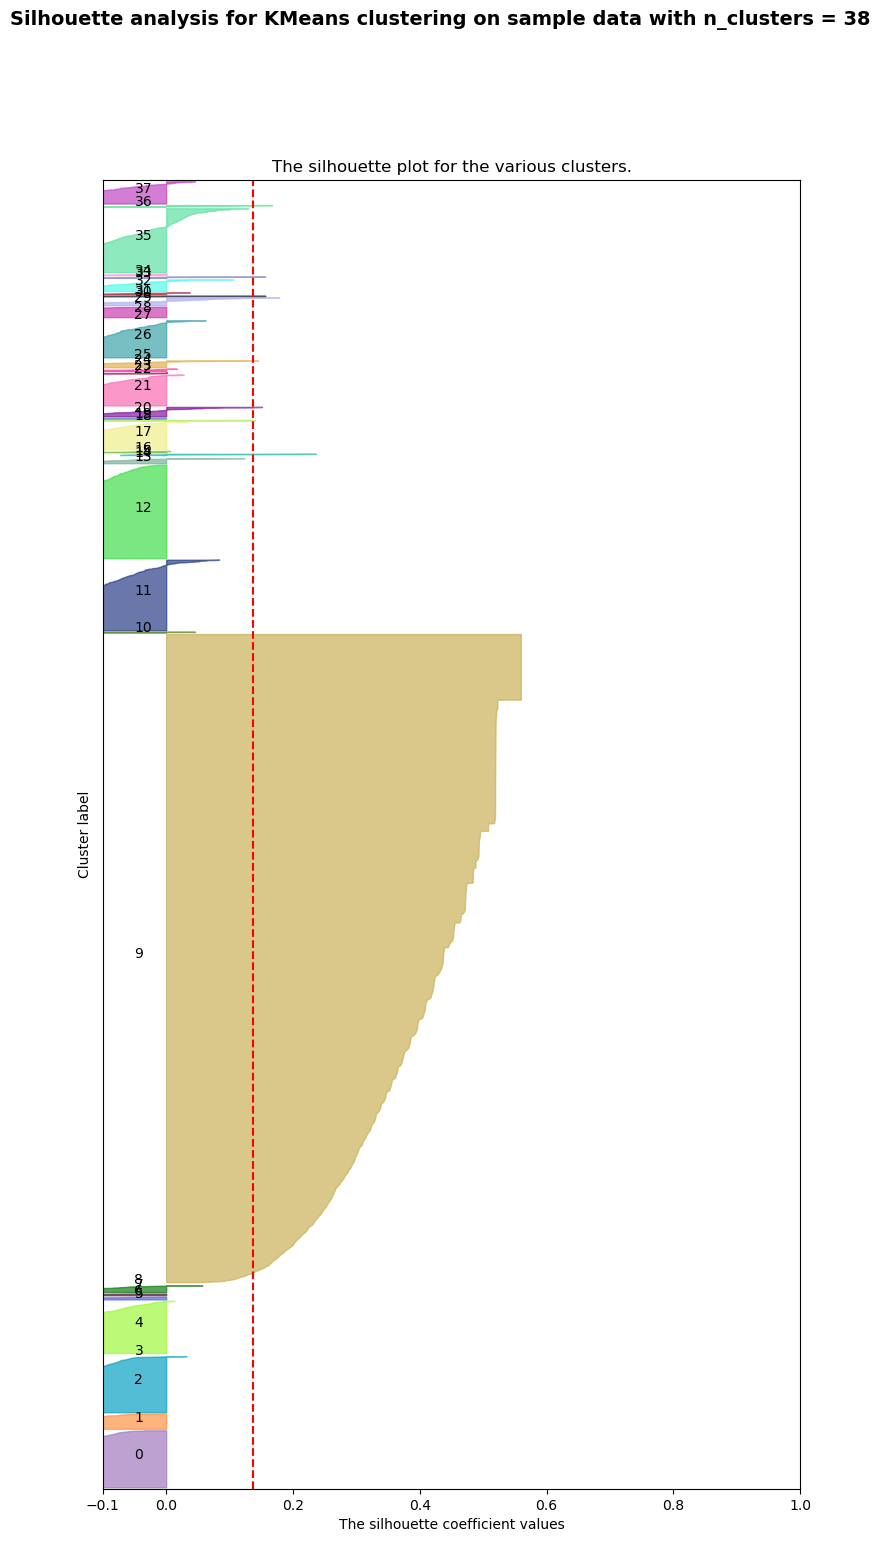

For n_clusters = 39 The average silhouette_score is : 0.012732061687344587


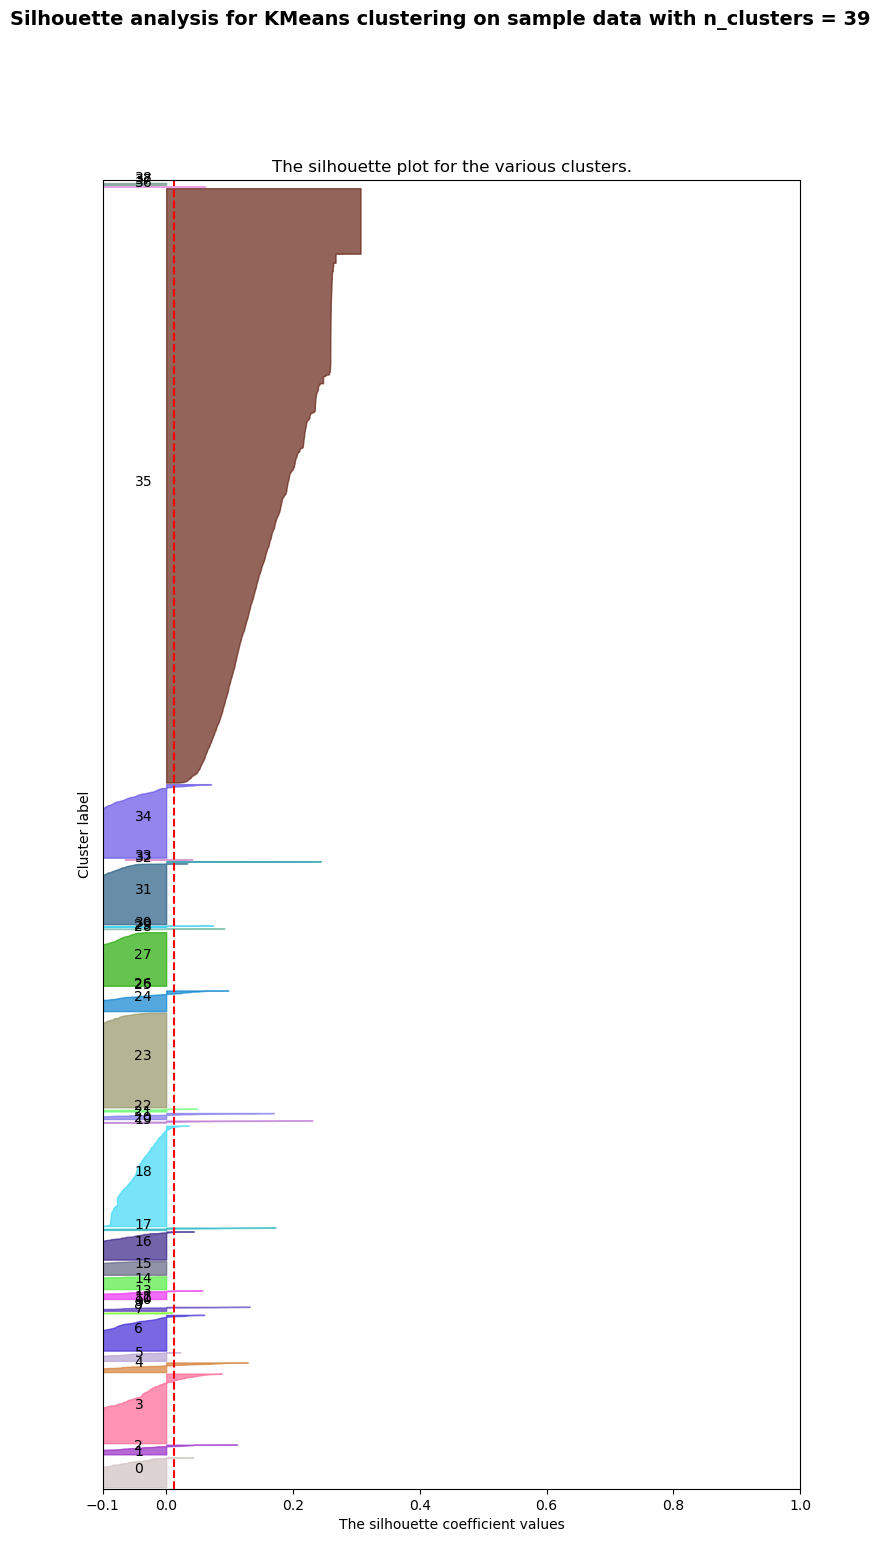

For n_clusters = 40 The average silhouette_score is : 0.1801057682901829


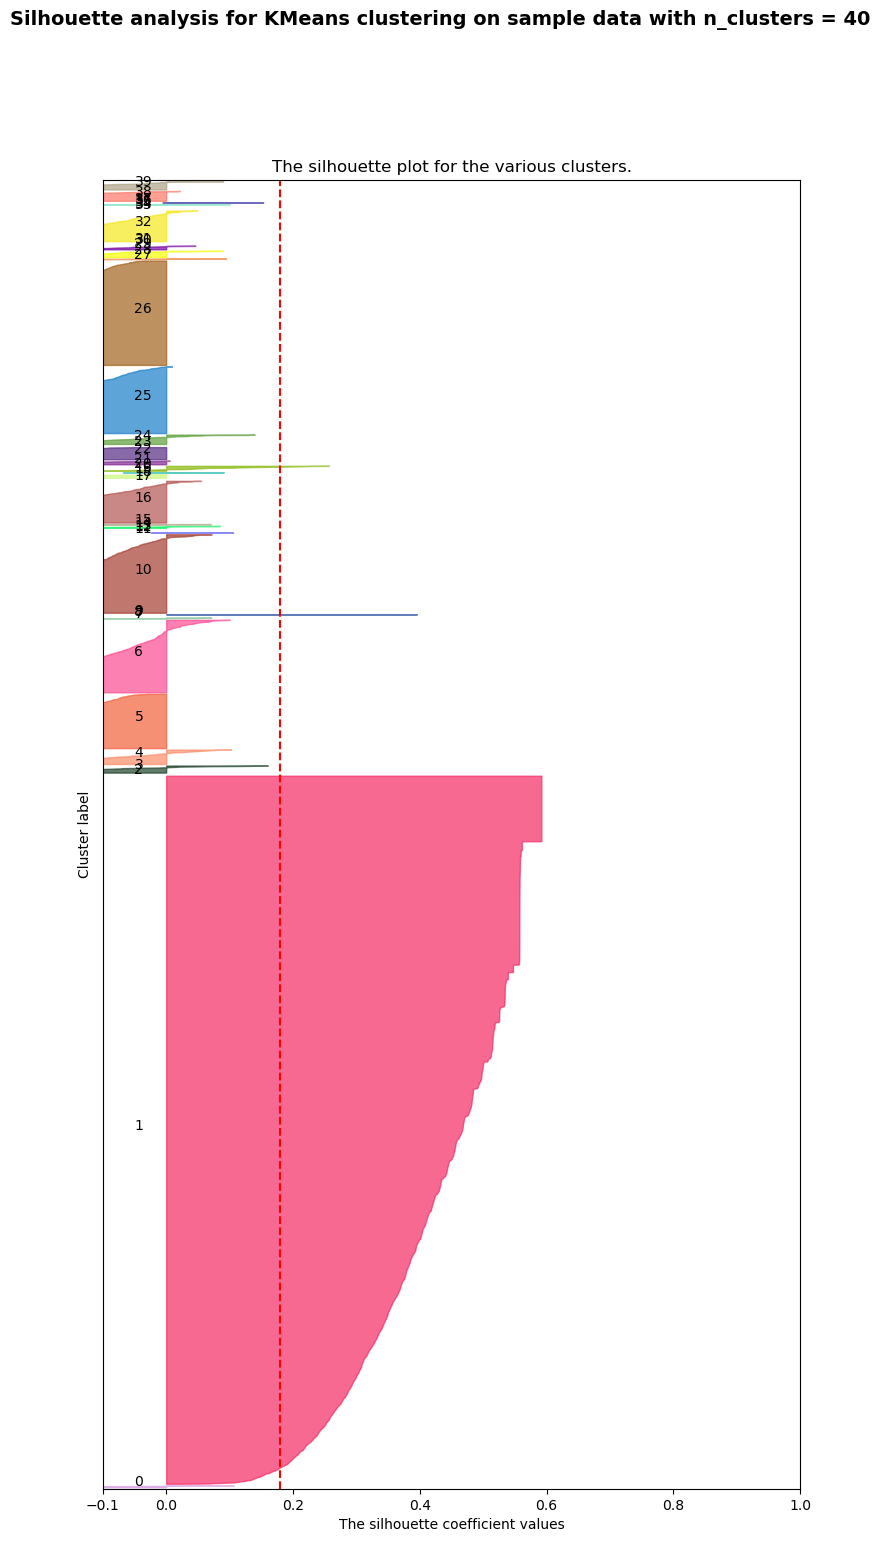

For n_clusters = 41 The average silhouette_score is : 0.1477422334677026


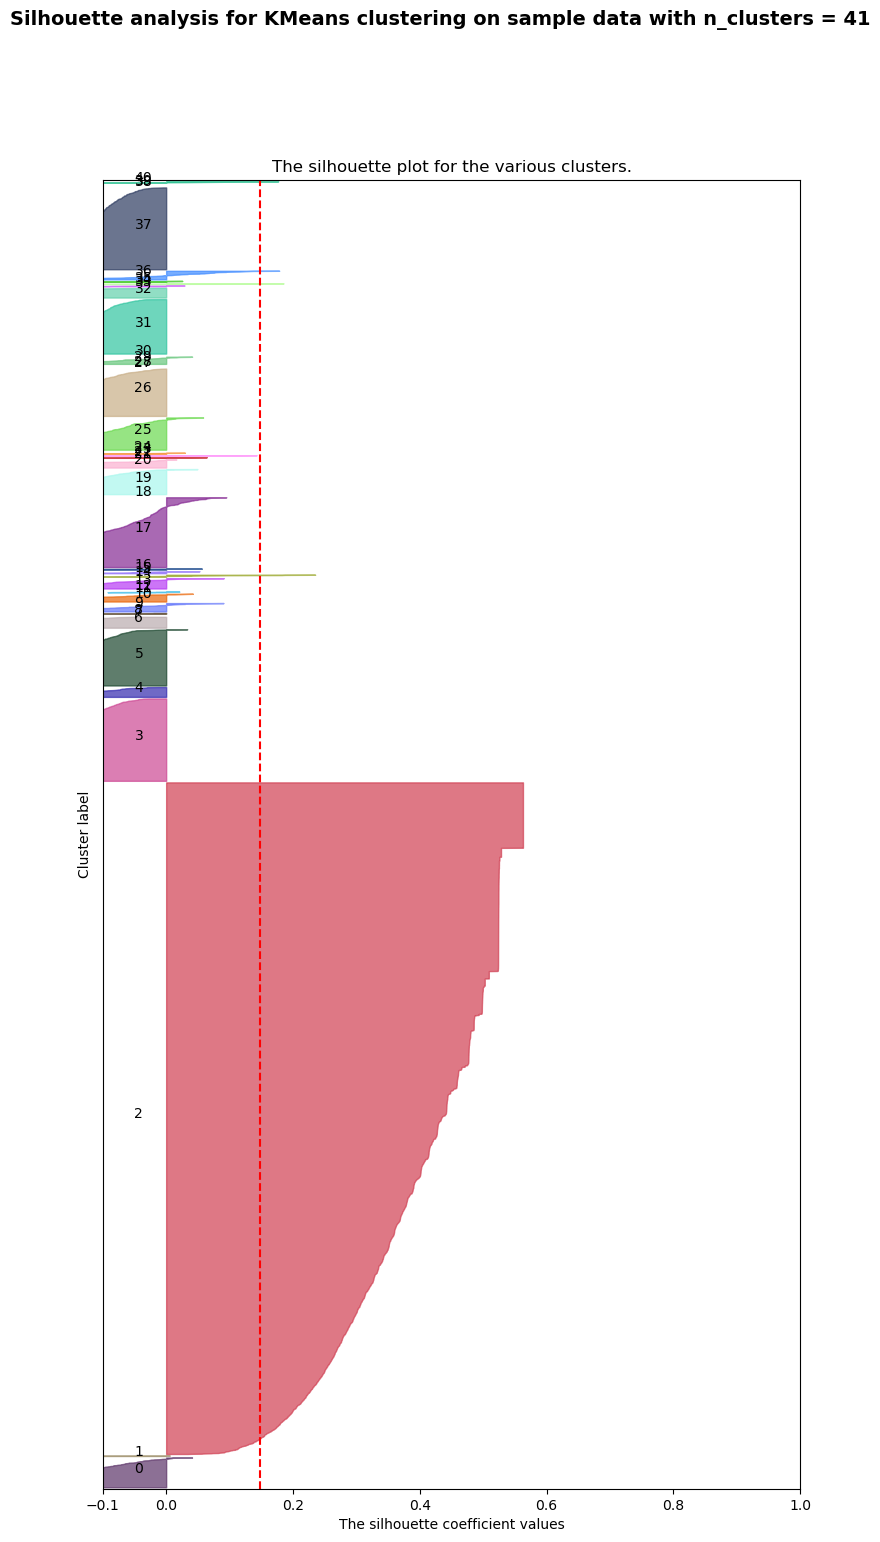

In [18]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.set_ylim([0, len(km.labels_) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()